In [1]:
# 1.) What was the change in price of the stock over time?
# 2.) What was the daily return of the stock on average?
# 3.) What was the moving average of the various stocks?
# 4.) What was the correlation between different stocks' closing prices?
# 4.) What was the correlation between different stocks' daily returns?
# 5.) How much value do we put at risk by investing in a particular stock?
# 6.) How can we attempt to predict future stock behavior?

In [2]:
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [40]:
techlist = ['AAPL','GOOG','MSFT','AMZN']

In [41]:
end = datetime.now()

In [42]:
start = datetime(end.year-1,end.month,end.day)

In [43]:
for stock in techlist:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,115.812727,116.890514,114.560237,115.725494,4.946119e+07,114.534450
std,11.235442,11.067783,11.343107,11.155613,2.054665e+07,10.523808
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,109.000000,110.190002,107.309998,108.739998,3.562680e+07,108.023837
50%,116.440002,117.489998,115.209999,116.169998,4.551900e+07,115.288244
75%,126.099998,127.099998,125.160004,126.010002,5.567880e+07,124.070079
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-03-17 to 2016-03-16
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


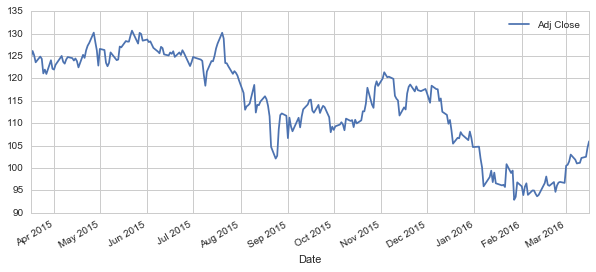

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

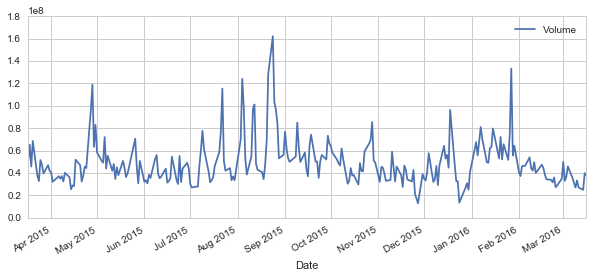

In [10]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [11]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

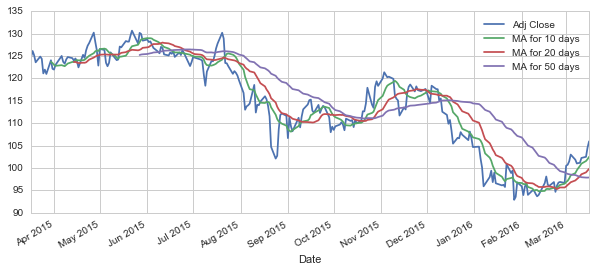

In [12]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,legend=True,figsize=(10,4))

In [13]:
#daily returns and risk of the stock

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

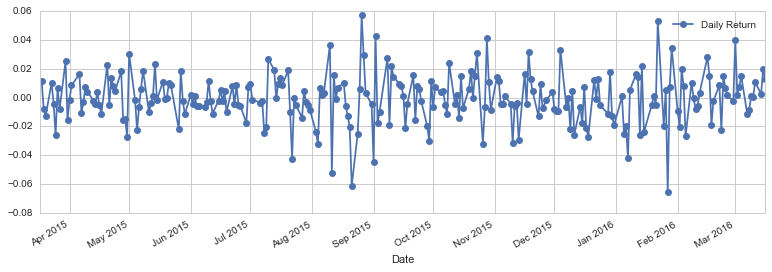

In [15]:
AAPL['Daily Return'].plot(figsize=(13,4),legend=True,linestyle='-',marker='o')

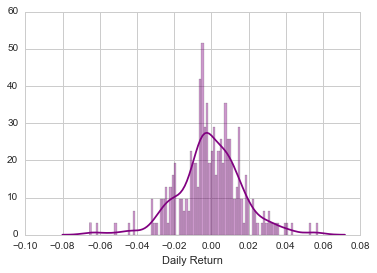

In [16]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

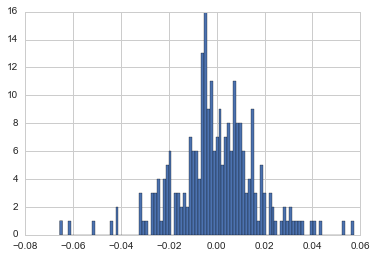

In [17]:
AAPL['Daily Return'].hist(bins=100)

In [18]:
closing = DataReader(techlist,'yahoo',start,end)['Adj Close']

In [19]:
closing.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-17,124.727883,371.920013,550.842471,40.592307
2015-03-18,126.131857,375.140015,559.502513,41.371055
2015-03-19,125.179510,373.239990,557.992512,41.166634
2015-03-20,123.608631,378.489990,560.362537,41.740962
2015-03-23,124.894787,375.109985,558.812510,41.721493


In [20]:
techret = closing.pct_change()

In [21]:
techret.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-17,NaN,NaN,NaN,NaN
2015-03-18,0.011256,0.008658,0.015721,0.019185
2015-03-19,-0.007550,-0.005065,-0.002699,-0.004941
2015-03-20,-0.012549,0.014066,0.004247,0.013951
2015-03-23,0.010405,-0.008930,-0.002766,-0.000466


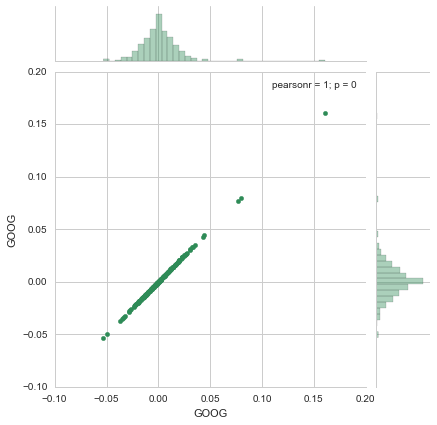

In [22]:
sns.jointplot('GOOG','GOOG',techret,kind = 'scatter',color='seagreen')

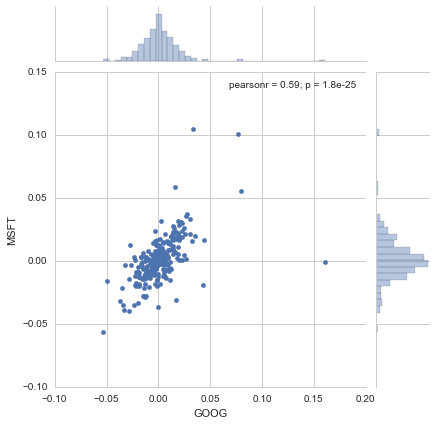

In [23]:
sns.jointplot('GOOG','MSFT',techret,kind = 'scatter')

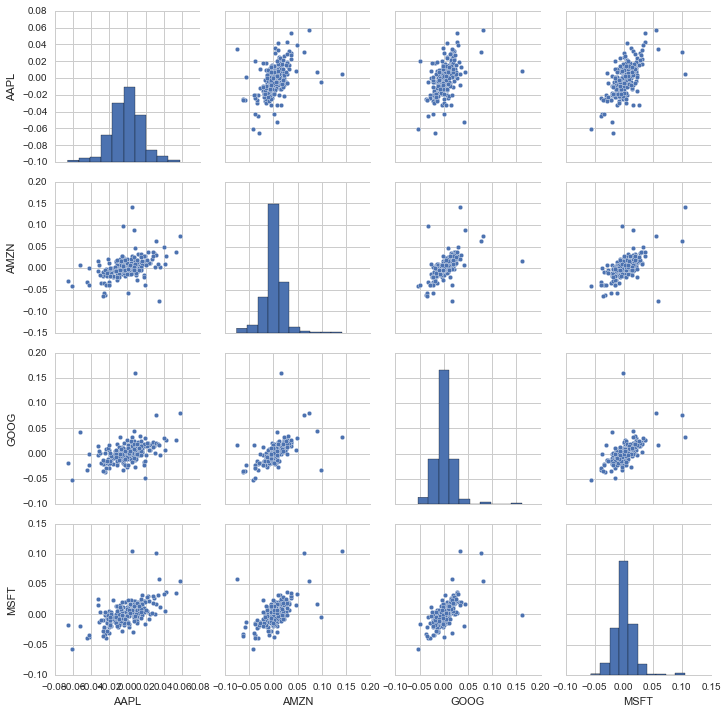

In [24]:
sns.pairplot(techret.dropna())

In [25]:
techret[['AAPL','GOOG']].head()

,AAPL,GOOG
Date,,
2015-03-17,NaN,NaN
2015-03-18,0.011256,0.015721
2015-03-19,-0.007550,-0.002699
2015-03-20,-0.012549,0.004247
2015-03-23,0.010405,-0.002766


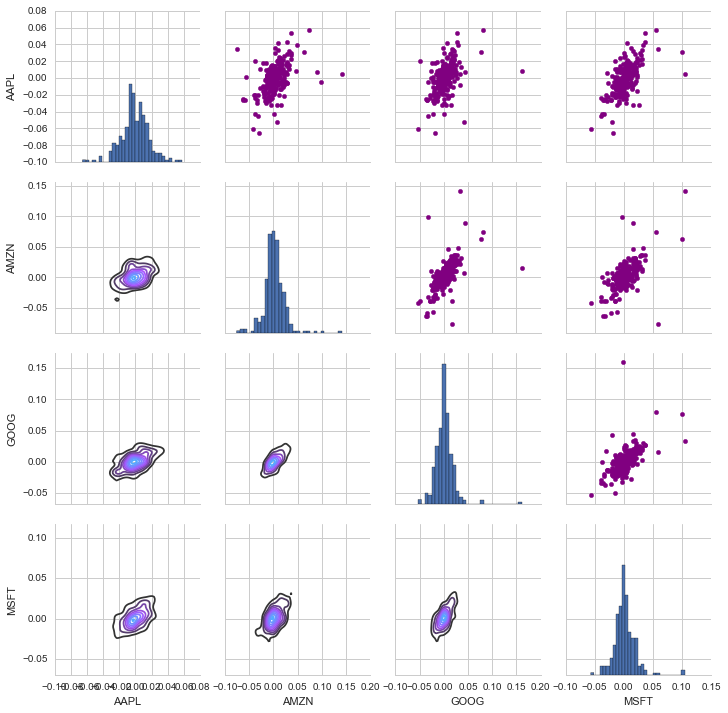

In [26]:
returnfig = sns.PairGrid(techret.dropna())

returnfig.map_upper(plt.scatter,color='purple')
returnfig.map_lower(sns.kdeplot,cmap='cool_d')
returnfig.map_diag(plt.hist,bins=30)

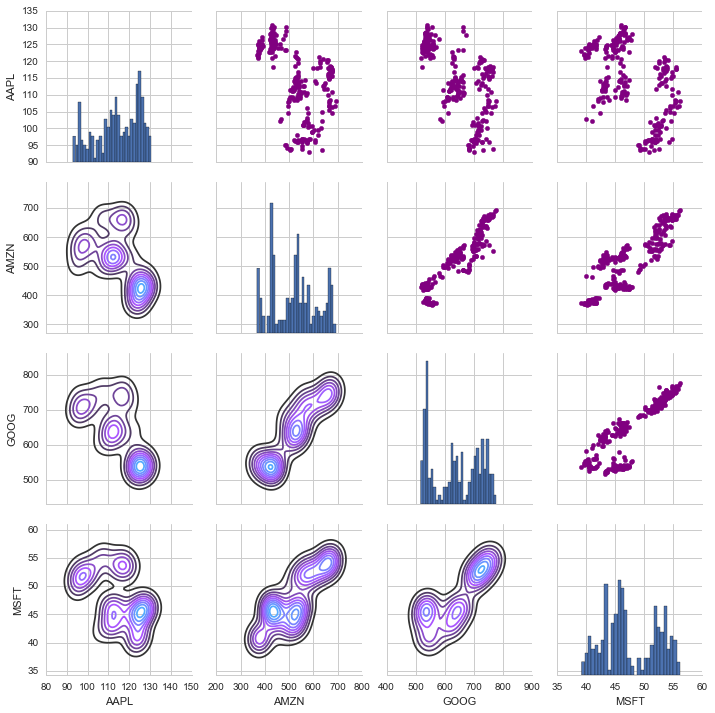

In [27]:
returnfig = sns.PairGrid(closing.dropna())

returnfig.map_upper(plt.scatter,color='purple')
returnfig.map_lower(sns.kdeplot,cmap='cool_d')
returnfig.map_diag(plt.hist,bins=30)

//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


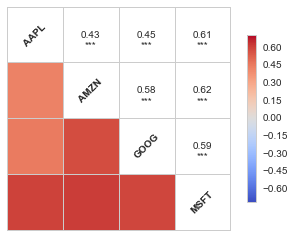

In [28]:
sns.corrplot(techret.dropna(),annot=True)

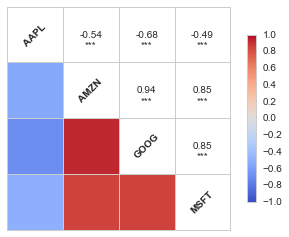

In [29]:
sns.corrplot(closing.dropna(),annot=True)

In [30]:
#Risk Analysis




In [31]:
ret = techret.dropna()

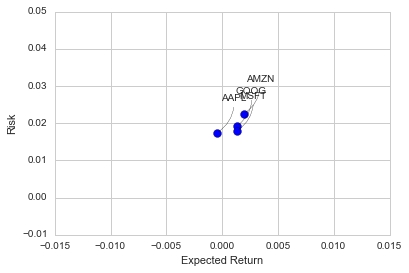

In [32]:
area = np.pi * 20

plt.scatter(ret.mean(),ret.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(ret.columns, ret.mean(), ret.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [33]:
# Risk analysis





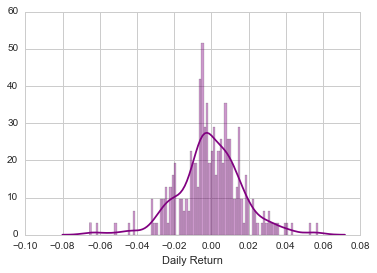

In [34]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [35]:
ret.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-18,0.011256,0.008658,0.015721,0.019185
2015-03-19,-0.007550,-0.005065,-0.002699,-0.004941
2015-03-20,-0.012549,0.014066,0.004247,0.013951
2015-03-23,0.010405,-0.008930,-0.002766,-0.000466
2015-03-24,-0.004088,-0.002719,0.020365,0.000933


In [36]:
ret['AAPL'].quantile(0.05)

-0.026870597580305255

In [37]:
days = 365
dt = 1/days
mu = ret['GOOG'].mean()
sigma = ret['GOOG'].std()

In [38]:
def stock_mc(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
    return price



In [45]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-17,551.712472,553.802493,548.002468,550.842471,1805500,550.842471
2015-03-18,552.502480,559.782516,547.002472,559.502513,2134500,559.502513
2015-03-19,559.392531,560.802526,556.147548,557.992512,1197200,557.992512
2015-03-20,561.652513,561.722529,559.052548,560.362537,2616800,560.362537
2015-03-23,560.432554,562.362529,555.832536,558.812510,1643800,558.812510


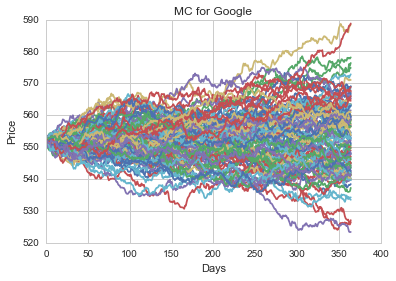

In [47]:
start_price = 551.71

for run in xrange(100):
    plt.plot(stock_mc(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('MC for Google')

In [50]:
runs = 10000

simulation = np.zeros(runs)

for run in xrange(runs):
    simulation[run] = stock_mc(start_price,days,mu,sigma)[days-1]

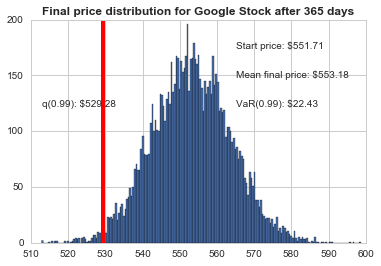

In [51]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');